In [247]:
import pandas as pd 
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,mean_squared_error

In [86]:
path1=(r"C:\Users\Mamer Jammer\Desktop\political campagins stuff\haledon_voter_info.xlsx ")
churn_data=pd.read_excel(path1)

In [87]:
churn_data

,Unnamed: 0,Precinct,Voters_FirstName,Voters_MiddleName,Voters_LastName,Residence_Addresses_AddressLine,Residence_Families_HHCount,Residence_HHParties_Description,Voters_BirthDate,Voters_OfficialRegDate,...,PRI_BLT_2012-06-05,PRI_BLT_2013-06-04,PRI_BLT_2014-06-03,PRI_BLT_2015-06-02,PRI_BLT_2017-06-06,PRI_BLT_2018-06-05,PRI_BLT_2019-06-04,PRI_BLT_2016-06-07,Voters_Gender,Parties_Description
0,NaN,HALEDON BORO 2,Joseph,E,Parkin,1 Richard Scott Ct,1,Democratic,1924-04-17,1952-09-23,...,Democratic,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Democratic,1.0,Democratic
1,NaN,HALEDON BORO 6,Philip,J,Marshall,235B Granite Ave,1,Democratic,1926-04-05,1963-03-04,...,Did Not Vote,Did Not Vote,Did Not Vote,Democratic,Did Not Vote,Did Not Vote,Did Not Vote,Democratic,1.0,Democratic
2,NaN,HALEDON BORO 3,Salvatore,NaN,Esposito,115 Pompton Rd,3,Democratic & Republican,1927-11-09,1972-08-18,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Democratic,1.0,Democratic
3,NaN,HALEDON BORO 5,Maria,NaN,Barahona,1103 Gatherings Dr Apt 110,2,Democratic,1927-09-25,2008-03-25,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Democratic,2.0,Democratic
4,NaN,HALEDON BORO 3,Inez,1,Molano,655 Belmont Ave,1,Democratic,1929-05-28,1995-10-10,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Democratic,2.0,Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,HALEDON BORO 4,Jenissa,NaN,Perez-Lebron,317 W Clinton St,2,Democratic & Independent,1981-11-06,1999-11-30,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Republican,2.0,Non-Partisan
4406,NaN,HALEDON BORO 1,Lauren,1,Lyttle,330 W Clinton St,1,Independent,1989-05-17,2014-10-14,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Republican,2.0,Non-Partisan
4407,NaN,HALEDON BORO 3,Kelsey,L,Pengitore,71 Sherwood Ave,4,Republican & Independent,1991-01-05,2009-01-09,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Republican,2.0,Non-Partisan
4408,NaN,HALEDON BORO 1,Arnold,NaN,Avdyli,77 N 14th St Apt 1,2,Democratic & Independent,1995-10-11,2014-03-18,...,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Did Not Vote,Republican,1.0,Non-Partisan


In [88]:
voterlist=churn_Data
voterlist.columns

Index(['Precinct', 'Voters_FirstName', 'Voters_MiddleName', 'Voters_LastName',
       'Voters_Age', 'Broad Ethnic Groupings', 'PRI_BLT_2012-06-05',
       'PRI_BLT_2013-06-04', 'PRI_BLT_2014-06-03', 'PRI_BLT_2015-06-02',
       'PRI_BLT_2017-06-06', 'PRI_BLT_2018-06-05', 'PRI_BLT_2019-06-04',
       'PRI_BLT_2016-06-07', 'Voters_Gender', 'Parties_Description'],
      dtype='object')

In [91]:
voterlist.drop(['Precinct', 'Voters_FirstName', 'Voters_MiddleName', 'Voters_LastName'],axis=1,inplace=True)

In [111]:
voterlist.drop('Broad Ethnic Groupings',axis=1,inplace=True)

In [109]:
voterlist.replace({'Democrat':1,'Republican':2,'Non-Partisan':0,"Did Not Vote":0,'Democratic':1},inplace=True)

In [136]:
voterlist.Voters_Gender=voterlist.Voters_Gender.astype(str)
voterlist.Voters_Gender=voterlist.Voters_Gender.replace({'2.0':2,'1.0':1})

In [140]:
voterlist=voterlist.dropna()

In [141]:
# Create arrays for the features and the target: X, y
X =voterlist.drop("PRI_BLT_2016-06-07",axis=1).values
y=voterlist["PRI_BLT_2016-06-07"].values


In [165]:

# Create the training and test sets
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=123)

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
# Instantiate the XGBClassifier: xg_cl
for learning_rate in learning_rates:
    xg_cl = xgb.XGBClassifier(objective='reg:logistic', n_estimators=24,learning_rate = learning_rate,max_depth=3, seed=123)

# Fit the classifier to the training set
    xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
    preds = xg_cl.predict(X_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xg_cl.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xg_cl.score(X_test, y_test)))
    print()



[13:00:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate:  0.05
Accuracy score (training): 0.844
Accuracy score (validation): 0.828

[13:00:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate:  0.1
Accuracy score (training): 0.844
Accuracy score (validation): 0.834

[13:00:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate:  0.25
Accuracy score (training): 0.848
Accuracy

In [250]:
# just a test , keeping these lines alive for now 
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

accuracy: 0.837020
RMSE: 0.420654


In [249]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_4))
print("RMSE: %f" % (rmse))

accuracy: 0.8288707799767171
RMSE: 0.438274


In [180]:
print (classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       679
           1       0.69      0.40      0.50       174
           2       0.50      0.17      0.25         6

    accuracy                           0.84       859
   macro avg       0.68      0.51      0.55       859
weighted avg       0.82      0.84      0.82       859



In [181]:
print (confusion_matrix(y_test,preds))

[[649  30   0]
 [104  69   1]
 [  4   1   1]]


No handles with labels found to put in legend.


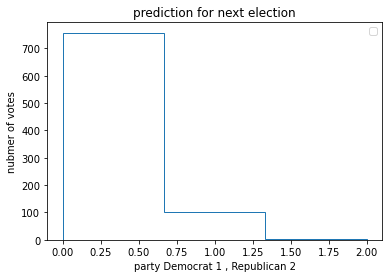

In [203]:
plt.hist(preds,bins=3,histtype='step')
plt.title('prediction for next election')
plt.ylabel('nubmer of votes')
plt.xlabel('party Democrat 1 , Republican 2')


In [218]:
predictions=pd.DataFrame(preds)
predictions.rename(columns={0:'XGBoost'})

,XGBoost
0,0
1,0
2,0
3,0
4,0
...,...
854,0
855,0
856,0
857,0


In [225]:
predictions['decisiontree']=y_pred_4

Text(0.5, 0, 'party Democrat 1 , Republican 2')

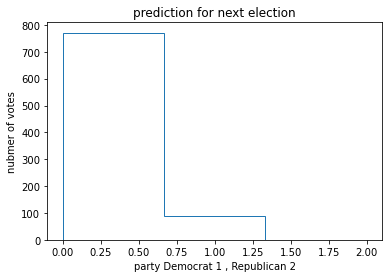

In [210]:
plt.hist(y_pred_4,bins=3,histtype='step')
plt.title('prediction for next election')
plt.ylabel('nubmer of votes')
plt.xlabel('party Democrat 1 , Republican 2')

In [226]:
predictions.decisiontree.value_counts()

0    771
1     87
2      1
Name: decisiontree, dtype: int64

In [251]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import BaggingClassifier as bc 

In [257]:
random=rf(n_estimators=100,max_depth=3,bootstrap=True)
random.fit(X_train,y_train)
rf_pred=random.predict(X_test)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy:", accuracy)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE: %f" % (rmse))

accuracy: 0.8311990686845169
RMSE: 0.435609


In [237]:
predictions['rf']=rf_pred

Text(0.5, 0, '0 did not vote ,  Democrat 1 , Republican 2')

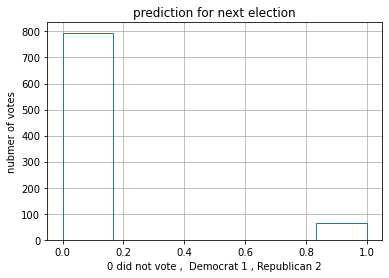

In [245]:
predictions.rf.hist(bins=6,histtype='step')
plt.title('prediction for next election')
plt.ylabel('nubmer of votes')
plt.xlabel('0 did not vote ,  Democrat 1 , Republican 2')

In [240]:
predictions.rf.value_counts()

0    795
1     64
Name: rf, dtype: int64

In [256]:
bagging=bc(n_estimators=100,bootstrap=True)
bagging.fit(X_train,y_train)
b_pred=bagging.predict(X_test)
accuracy = float(np.sum(b_pred==y_test))/y_test.shape[0]
print("accuracy:", accuracy)
rmse = np.sqrt(mean_squared_error(y_test,b_pred))
print("RMSE: %f" % (rmse))

accuracy: 0.8218859138533178
RMSE: 0.438274
